In [4]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [5]:
import pandas as pd
from scipy import stats

In [6]:
cx = pd.DataFrame({'subject': ['Segundo', 'Valentino', 'Doppio', 'Alessandro', 'Allan'], 'rebound': [67.7669, 4.33299, 99.5362, 29.2643, 128.16]}).set_index('subject')
print(cx.to_markdown())

| subject    |   rebound |
|:-----------|----------:|
| Segundo    |  67.7669  |
| Valentino  |   4.33299 |
| Doppio     |  99.5362  |
| Alessandro |  29.2643  |
| Allan      | 128.16    |


In [7]:
stats.ttest_1samp(cx, 0)

Ttest_1sampResult(statistic=array([2.92226668]), pvalue=array([0.04314564]))

In [8]:
hc = pd.DataFrame({'subject': ['Segundo', 'Valentino', 'Doppio', 'Alessandro', 'Allan'], 'rebound': [13.5786, 28.4419, 38.0667, 15.6392, 24.4538]}).set_index('subject')
print(hc.to_markdown())

| subject    |   rebound |
|:-----------|----------:|
| Segundo    |   13.5786 |
| Valentino  |   28.4419 |
| Doppio     |   38.0667 |
| Alessandro |   15.6392 |
| Allan      |   24.4538 |


In [9]:
stats.ttest_1samp(hc, 0)

Ttest_1sampResult(statistic=array([5.39958169]), pvalue=array([0.00569379]))

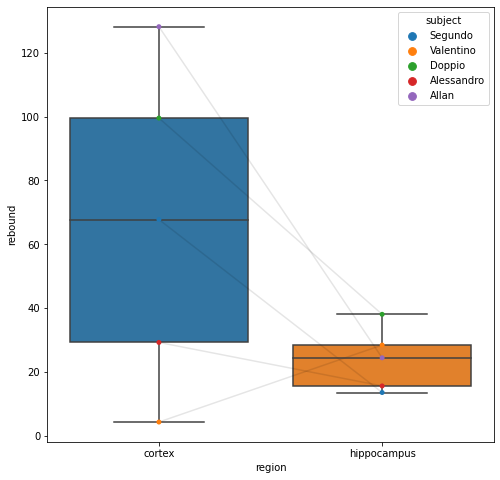

In [12]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

def join_swarm_points(df, ax, x_variable):
    left_key, right_key = df.index.get_level_values(x_variable).unique()

    left_pts = ax.get_children()[0].get_offsets()
    right_pts = ax.get_children()[1].get_offsets()

    for subject_name in df.index.get_level_values('subject').unique():
        left_val = df.xs((left_key, subject_name))
        right_val = df.xs((right_key, subject_name))
        left_pt_idx = np.argwhere(np.isclose(left_pts, left_val)).squeeze()[0]
        right_pt_idx = np.argwhere(np.isclose(right_pts, right_val)).squeeze()[0]
        x = [left_pts[left_pt_idx, 0], right_pts[right_pt_idx, 0]]
        y = [left_pts[left_pt_idx, 1], right_pts[right_pt_idx, 1]]
        ax.plot(x, y, color='black', alpha=0.1)
        
df = pd.concat([cx, hc], keys=['cortex', 'hippocampus'], names=['region', 'subject'])

fig, ax = plt.subplots(figsize=(8, 8))
sns.boxplot(data=df.reset_index(), x='region', y='rebound', ax=ax)
sns.swarmplot(data=df.reset_index(), x='region', y='rebound', hue='subject', ax=ax)
join_swarm_points(df, ax, 'region')